# WeatherPy
* Based off the Latitude vs. Maximum Temperature plot, we can conclude that temperatures are highest nearest the equator.
* Based off the Latitude vs. Humidity plot, we can conclude that humidity is consistently high nearest the equator. However, we can also see that away from the equator, humidity will still vary from 0-100.
* As for Latitude vs. Cloudiness and Latitude vs. Wind Speed, it seems there is no correlation as cloudiness varies between 0 - 100 and wind speed roughly varies between 0 - 25 km/h across all latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import urllib

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

# Perform API Calls

In [3]:
# Keep query and type of measurement in variables to call later
query = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Dictionary to hold data from queries
info = {
    'City': [],
    'Cloudiness': [],
    'Country': [],
    'Date': [],
    'Humidity': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Wind Speed': []
}

# Counter for amount of successful entries
counter = 1

print("Beginning Data Retrieval")
print("-"*25)

# Gets current epoch time for use of calculating total time taken to process queries
start_timer = time.time()

for city in cities:
    try:
        payload = {
            'q': city,
            'APPID': api_key,
            'units': units
        }
        param = urllib.parse.urlencode(payload)
        response = requests.get(query, params=param).json()
        
        try:
            info['City'].append(response['name'])
            info['Cloudiness'].append(response['clouds']['all'])
            info['Country'].append(response['sys']['country'])
            info['Date'].append(response['dt'])
            info['Humidity'].append(response['main']['humidity'])
            info['Lat'].append(response['coord']['lat'])
            info['Lng'].append(response['coord']['lon'])
            info['Max Temp'].append(response['main']['temp_max'])
            info['Wind Speed'].append(response['wind']['speed'])
            print(f"Processing Record {counter} | {city}")
            counter += 1
        except KeyError as err:
            print(f"Error: Could not find {err} for {city}. Skipping...")
            
    except requests.exceptions.HTTPError as err:
        print(err)

# Calculate total time to process
total_time = time.time()-start_timer

# Get current date for later use in saving files and plot titles
date = time.strftime('%Y-%m-%d', time.localtime())

print("-"*25)
print("Data Retrieval Complete")
print(f"{counter-1} successful queries in {total_time} s.")
print("-"*25)

Beginning Data Retrieval
-------------------------
Processing Record 1 | comodoro rivadavia
Processing Record 2 | nyagan
Processing Record 3 | binga
Processing Record 4 | killybegs
Processing Record 5 | castro
Processing Record 6 | faya
Processing Record 7 | punta arenas
Processing Record 8 | khash
Processing Record 9 | saint-philippe
Processing Record 10 | inhambane
Processing Record 11 | egvekinot
Processing Record 12 | tigil
Processing Record 13 | kruisfontein
Error: Could not find 'name' for tsihombe. Skipping...
Processing Record 14 | rikitea
Processing Record 15 | khatanga
Processing Record 16 | ushuaia
Processing Record 17 | porto novo
Processing Record 18 | poya
Processing Record 19 | sasayama
Error: Could not find 'name' for duz. Skipping...
Processing Record 20 | chuy
Processing Record 21 | teseney
Processing Record 22 | atuona
Processing Record 23 | ilulissat
Processing Record 24 | bredasdorp
Processing Record 25 | mataura
Processing Record 26 | hithadhoo
Processing Record 2

Processing Record 214 | poso
Processing Record 215 | baglung
Processing Record 216 | oktyabrskiy
Processing Record 217 | hofn
Processing Record 218 | komsomolskiy
Error: Could not find 'name' for zhanatas. Skipping...
Processing Record 219 | gat
Processing Record 220 | teshie
Processing Record 221 | yerbogachen
Error: Could not find 'name' for ituni. Skipping...
Processing Record 222 | moen
Processing Record 223 | oranjemund
Processing Record 224 | djambala
Processing Record 225 | colares
Processing Record 226 | mandalgarh
Processing Record 227 | praxedis guerrero
Processing Record 228 | madukkur
Processing Record 229 | atar
Processing Record 230 | coari
Error: Could not find 'name' for karamea. Skipping...
Processing Record 231 | dzhida
Processing Record 232 | tibiri
Processing Record 233 | iglesias
Processing Record 234 | nong khai
Processing Record 235 | bage
Processing Record 236 | mgandu
Error: Could not find 'name' for mentok. Skipping...
Processing Record 237 | dakar
Processing 

Processing Record 410 | fukue
Processing Record 411 | chicama
Processing Record 412 | samarai
Processing Record 413 | alta floresta
Processing Record 414 | san pedro
Processing Record 415 | sao joao da barra
Processing Record 416 | bontang
Processing Record 417 | usoke
Processing Record 418 | altamont
Processing Record 419 | kastamonu
Processing Record 420 | melipilla
Processing Record 421 | bambous virieux
Processing Record 422 | ziro
Processing Record 423 | iquitos
Processing Record 424 | bubaque
Processing Record 425 | guilin
Processing Record 426 | xichang
Processing Record 427 | saint-francois
Error: Could not find 'name' for cockburn harbour. Skipping...
Processing Record 428 | yorosso
Processing Record 429 | kieta
Processing Record 430 | port-gentil
Processing Record 431 | edd
Processing Record 432 | kulhudhuffushi
Processing Record 433 | hof
Processing Record 434 | yuzhou
Processing Record 435 | langarud
Processing Record 436 | curup
Error: Could not find 'name' for palabuhanra

In [4]:
weather_df = pd.DataFrame(info)
weather_df.info()
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 9 columns):
City          539 non-null object
Cloudiness    539 non-null int64
Country       539 non-null object
Date          539 non-null int64
Humidity      539 non-null int64
Lat           539 non-null float64
Lng           539 non-null float64
Max Temp      539 non-null float64
Wind Speed    539 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.0+ KB


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Comodoro Rivadavia,40,AR,1570433640,50,-45.87,-67.48,51.80,14.99
1,Nyagan,98,RU,1570433640,66,62.14,65.43,45.85,5.35
2,Binga,0,ZW,1570433641,23,-17.62,27.34,91.78,10.42
3,Killybegs,20,IE,1570433641,76,54.63,-8.45,57.20,20.80
4,Castro,0,CL,1570433357,86,-42.48,-73.76,39.20,4.70


### Save data into CSV

In [5]:
weather_df.to_csv(f"random_weather_data_{date}.csv")

### Plots

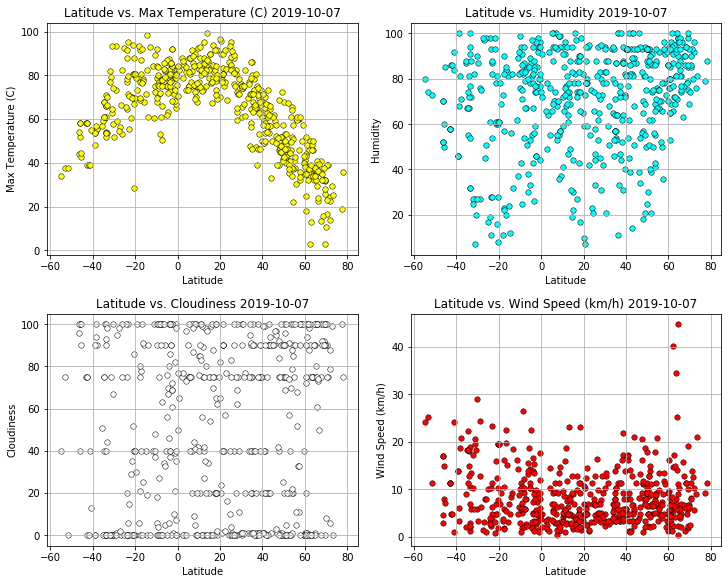

In [6]:
fig, ax = plt.subplots(2, 2,
                       figsize=(10,8),
                       constrained_layout=True)

# Common traits
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("Latitude")
        ax[i,j].grid()

ax[0,0].scatter(weather_df.Lat, weather_df['Max Temp'], marker='o', s=30, c='yellow', edgecolor='black', linewidth='0.5')
ax[0,0].set_title(f"Latitude vs. Max Temperature (C) {date}")
ax[0,0].set_ylabel("Max Temperature (C)")

ax[0,1].scatter(weather_df.Lat, weather_df['Humidity'], marker='o', s=30, c='cyan', edgecolor='black', linewidth='0.5')
ax[0,1].set_title(f"Latitude vs. Humidity {date}")
ax[0,1].set_ylabel("Humidity")

ax[1,0].scatter(weather_df.Lat, weather_df['Cloudiness'], marker='o', s=30, c='white', edgecolor='black', linewidth='0.5')
ax[1,0].set_title(f"Latitude vs. Cloudiness {date}")
ax[1,0].set_ylabel("Cloudiness")

ax[1,1].scatter(weather_df.Lat, weather_df['Wind Speed'], marker='o', s=30, c='red', edgecolor='black', linewidth='0.5')
ax[1,1].set_title(f"Latitude vs. Wind Speed (km/h) {date}")
ax[1,1].set_ylabel("Wind Speed (km/h)")

plt.show()

### Save Plots as Images

In [7]:
fig.savefig(f"latitude_plots_{date}.png")